In [1]:
from chembl_webresource_client.new_client import new_client
from tqdm.notebook import tqdm
import pandas as pd
import dask.dataframe as dd
import matplotlib.pyplot as plt
import pubchempy as pcp
import missingno as msno

plt.style.use('default')
plt.rc('text', usetex=True)
plt.rc('font', family='sans-serif')
plt.rc('font', size=14)
plt.rc('axes', titlesize=14)
plt.rc('axes', labelsize=14)
plt.rc('xtick', labelsize=14)
plt.rc('ytick', labelsize=14)
plt.rc('legend', fontsize=14)
plt.rc('lines', markersize=10)

In [2]:
features_enriched = pd.read_csv('datasets/features_enriched.csv')

In [3]:
features_enriched

,cell_type,sm_name,sm_lincs_id,SMILES,control,count_mean_x,count_sum_x,normalized_count_mean_x,normalized_count_sum_x,donor_id,count_mean_y,count_sum_y,normalized_count_mean_y,normalized_count_sum_y
0,NK cells,Clotrimazole,LSM-5341,Clc1ccccc1C(c1ccccc1)(c1ccccc1)n1ccnc1,False,2.569838,1113646.0,6.089993,2594365.50,donor_0,1.963997,8486400,3.087154,12380422.0
1,NK cells,Clotrimazole,LSM-5341,Clc1ccccc1C(c1ccccc1)(c1ccccc1)n1ccnc1,False,2.569838,1113646.0,6.089993,2594365.50,donor_1,2.316293,37358533,2.247343,30051866.0
2,NK cells,Clotrimazole,LSM-5341,Clc1ccccc1C(c1ccccc1)(c1ccccc1)n1ccnc1,False,2.569838,1113646.0,6.089993,2594365.50,donor_2,2.146908,34237687,2.629065,34069436.0
3,T cells CD4+,Clotrimazole,LSM-5341,Clc1ccccc1C(c1ccccc1)(c1ccccc1)n1ccnc1,False,3.512137,3467640.0,5.708712,5590162.00,donor_0,2.076197,54393790,2.734033,61413576.0
4,T cells CD4+,Clotrimazole,LSM-5341,Clc1ccccc1C(c1ccccc1)(c1ccccc1)n1ccnc1,False,3.512137,3467640.0,5.708712,5590162.00,donor_1,2.413838,85339280,2.137799,60205092.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1837,T cells CD8+,Riociguat,LSM-45758,COC(=O)N(C)c1c(N)nc(-c2nn(Cc3ccccc3F)c3ncccc23...,False,3.357596,539656.0,5.706329,898219.90,donor_1,2.364066,2188573,2.149885,1682515.2
1838,T cells CD8+,Riociguat,LSM-45758,COC(=O)N(C)c1c(N)nc(-c2nn(Cc3ccccc3F)c3ncccc23...,False,3.357596,539656.0,5.706329,898219.90,donor_2,2.191374,4153750,2.441746,3792025.5
1839,T regulatory cells,Riociguat,LSM-45758,COC(=O)N(C)c1c(N)nc(-c2nn(Cc3ccccc3F)c3ncccc23...,False,3.414985,375389.0,5.501163,596835.44,donor_0,1.971391,1758976,3.070118,2568549.8
1840,T regulatory cells,Riociguat,LSM-45758,COC(=O)N(C)c1c(N)nc(-c2nn(Cc3ccccc3F)c3ncccc23...,False,3.414985,375389.0,5.501163,596835.44,donor_1,2.276628,1870802,2.430153,1594193.9


In [4]:
# Rename sm_name O-Demethylated Adapalene to O-Desmethyl Adapalene
features_enriched['sm_name'] = features_enriched['sm_name'].replace('O-Demethylated Adapalene', 'O-Desmethyl Adapalene')
# Rename sm_name IN1451 to 2-(4-Amino-5-iodo-7-pyrrolo[2,3-d]pyrimidinyl)-5-(hydroxymethyl)oxolane-3,4-diol
features_enriched['sm_name'] = features_enriched['sm_name'].replace('IN1451',
                                                                  '2-(4-Amino-5-iodo-7-pyrrolo[2,3-d]pyrimidinyl)-5-(hydroxymethyl)oxolane-3,4-diol')

In [5]:
compound_list = features_enriched['sm_name'].unique().tolist()
chembl = pd.DataFrame()

In [6]:
compound_list

['Clotrimazole',
 'Mometasone Furoate',
 'Idelalisib',
 'Vandetanib',
 'Bosutinib',
 'Ceritinib',
 'Lamivudine',
 'Crizotinib',
 'Cabozantinib',
 'Flutamide',
 'Dasatinib',
 'Selumetinib',
 'Trametinib',
 'ABT-199',
 'Oxybenzone',
 'Vorinostat',
 'Raloxifene',
 'Linagliptin',
 'Lapatinib',
 'Canertinib',
 'Disulfiram',
 'Vardenafil',
 'Palbociclib',
 'Ricolinostat',
 'Dabrafenib',
 'Proscillaridin A',
 '2-(4-Amino-5-iodo-7-pyrrolo[2,3-d]pyrimidinyl)-5-(hydroxymethyl)oxolane-3,4-diol',
 'Ixabepilone',
 'CEP-18770',
 'RG7112',
 'MK-5108',
 'Resminostat',
 'IMD-0354',
 'Alvocidib',
 'LY2090314',
 'Methotrexate',
 'LDN 193189',
 'Tacalcitol',
 'Colchicine',
 'R428',
 'TL_HRAS26',
 'BMS-387032',
 'CGP 60474',
 'TIE2 Kinase Inhibitor',
 'PD-0325901',
 'Isoniazid',
 'GSK-1070916',
 'Masitinib',
 'Saracatinib',
 'CC-401',
 'Decitabine',
 'Ketoconazole',
 'HYDROXYUREA',
 'BAY 61-3606',
 'Navitoclax',
 'Porcn Inhibitor III',
 'GW843682X',
 'Prednisolone',
 'Tamatinib',
 'Tosedostat',
 'GSK256066

In [7]:
for i in range(len(compound_list)):
    if compound_list[i] != '5-(9-Isopropyl-8-methyl-2-morpholino-9H-purin-6-yl)pyrimidin-2-amine' and compound_list[i] != '2-(4-Amino-5-iodo-7-pyrrolo[2,3-d]pyrimidinyl)-5-(hydroxymethyl)oxolane-3,4-diol':
        compound_list[i] = compound_list[i].split('(')[0].strip()
for i in range(len(compound_list)):
    if compound_list[i] != '5-(9-Isopropyl-8-methyl-2-morpholino-9H-purin-6-yl)pyrimidin-2-amine' and compound_list[i] != '2-(4-Amino-5-iodo-7-pyrrolo[2,3-d]pyrimidinyl)-5-(hydroxymethyl)oxolane-3,4-diol':
        compound_list[i] = compound_list[i].split(';')[0].strip()

In [8]:
compound_list

['Clotrimazole',
 'Mometasone Furoate',
 'Idelalisib',
 'Vandetanib',
 'Bosutinib',
 'Ceritinib',
 'Lamivudine',
 'Crizotinib',
 'Cabozantinib',
 'Flutamide',
 'Dasatinib',
 'Selumetinib',
 'Trametinib',
 'ABT-199',
 'Oxybenzone',
 'Vorinostat',
 'Raloxifene',
 'Linagliptin',
 'Lapatinib',
 'Canertinib',
 'Disulfiram',
 'Vardenafil',
 'Palbociclib',
 'Ricolinostat',
 'Dabrafenib',
 'Proscillaridin A',
 '2-(4-Amino-5-iodo-7-pyrrolo[2,3-d]pyrimidinyl)-5-(hydroxymethyl)oxolane-3,4-diol',
 'Ixabepilone',
 'CEP-18770',
 'RG7112',
 'MK-5108',
 'Resminostat',
 'IMD-0354',
 'Alvocidib',
 'LY2090314',
 'Methotrexate',
 'LDN 193189',
 'Tacalcitol',
 'Colchicine',
 'R428',
 'TL_HRAS26',
 'BMS-387032',
 'CGP 60474',
 'TIE2 Kinase Inhibitor',
 'PD-0325901',
 'Isoniazid',
 'GSK-1070916',
 'Masitinib',
 'Saracatinib',
 'CC-401',
 'Decitabine',
 'Ketoconazole',
 'HYDROXYUREA',
 'BAY 61-3606',
 'Navitoclax',
 'Porcn Inhibitor III',
 'GW843682X',
 'Prednisolone',
 'Tamatinib',
 'Tosedostat',
 'GSK256066

In [9]:
def fetch_pubchem_properties(compound_name):
    try:
        compounds = pcp.get_compounds(compound_name, 'name')
        if len(compounds) == 0:
            return None
        compound = compounds[0]
        properties = {
            'MolecularWeight': compound.molecular_weight,
            'XLogP3-AA': compound.xlogp,
            'HydrogenBondDonorCount': compound.h_bond_donor_count,
            'HydrogenBondAcceptorCount': compound.h_bond_acceptor_count,
            'RotatableBondCount': compound.rotatable_bond_count,
            'ExactMass': compound.exact_mass,
            'MonoisotopicMass': compound.monoisotopic_mass,
            'TopologicalPolarSurfaceArea': compound.tpsa,
            'HeavyAtomCount': compound.heavy_atom_count,
            'FormalCharge': compound.charge,
            'Complexity': compound.complexity,
            'IsotopeAtomCount': compound.isotope_atom_count,
            'CovalentlyBondedUnitCount': compound.covalent_unit_count,
        }
        return properties
    except Exception as e:
        print(f"Failed to fetch data for {compound_name}: {e}")
        return None

In [10]:
pubchem_df = pd.DataFrame()
compound_names = compound_list

for compound in tqdm(compound_names, desc="Fetching data from PubChem"):
    compound_data = fetch_pubchem_properties(compound)
    if compound_data is not None:
        compound_data['sm_name'] = compound
        compound_data_df = pd.DataFrame([compound_data])
        pubchem_df = pd.concat([pubchem_df, compound_data_df], ignore_index=True)
        print(f"✅ Succesfully fetched data for {compound}")
    else:
        print(f"❌ Failed to fetch data for {compound}")

Fetching data from PubChem:   0%|          | 0/146 [00:00<?, ?it/s]

✅ Succesfully fetched data for Clotrimazole
✅ Succesfully fetched data for Mometasone Furoate
✅ Succesfully fetched data for Idelalisib
✅ Succesfully fetched data for Vandetanib
✅ Succesfully fetched data for Bosutinib
✅ Succesfully fetched data for Ceritinib
✅ Succesfully fetched data for Lamivudine
✅ Succesfully fetched data for Crizotinib
✅ Succesfully fetched data for Cabozantinib
✅ Succesfully fetched data for Flutamide
✅ Succesfully fetched data for Dasatinib
✅ Succesfully fetched data for Selumetinib
✅ Succesfully fetched data for Trametinib
✅ Succesfully fetched data for ABT-199
✅ Succesfully fetched data for Oxybenzone
✅ Succesfully fetched data for Vorinostat
✅ Succesfully fetched data for Raloxifene
✅ Succesfully fetched data for Linagliptin
✅ Succesfully fetched data for Lapatinib
✅ Succesfully fetched data for Canertinib
✅ Succesfully fetched data for Disulfiram
✅ Succesfully fetched data for Vardenafil
✅ Succesfully fetched data for Palbociclib
✅ Succesfully fetched data 

/var/folders/sm/lw2bbffs15g5l3r4ldd25hc00000gn/T/ipykernel_67084/2993557630.py:9: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  pubchem_df = pd.concat([pubchem_df, compound_data_df], ignore_index=True)


✅ Succesfully fetched data for CEP-18770
✅ Succesfully fetched data for RG7112
✅ Succesfully fetched data for MK-5108
✅ Succesfully fetched data for Resminostat
✅ Succesfully fetched data for IMD-0354
✅ Succesfully fetched data for Alvocidib
✅ Succesfully fetched data for LY2090314
✅ Succesfully fetched data for Methotrexate
✅ Succesfully fetched data for LDN 193189
✅ Succesfully fetched data for Tacalcitol
✅ Succesfully fetched data for Colchicine
✅ Succesfully fetched data for R428
✅ Succesfully fetched data for TL_HRAS26
✅ Succesfully fetched data for BMS-387032
✅ Succesfully fetched data for CGP 60474
✅ Succesfully fetched data for TIE2 Kinase Inhibitor
✅ Succesfully fetched data for PD-0325901
✅ Succesfully fetched data for Isoniazid
✅ Succesfully fetched data for GSK-1070916
✅ Succesfully fetched data for Masitinib
✅ Succesfully fetched data for Saracatinib
✅ Succesfully fetched data for CC-401
✅ Succesfully fetched data for Decitabine
✅ Succesfully fetched data for Ketoconazole


In [11]:
pubchem_df_columns = pubchem_df.columns.tolist()
pubchem_df_columns = pubchem_df_columns[-1:] + pubchem_df_columns[:-1]
pubchem_df = pubchem_df[pubchem_df_columns]

In [12]:
pubchem_df

,sm_name,MolecularWeight,XLogP3-AA,HydrogenBondDonorCount,HydrogenBondAcceptorCount,RotatableBondCount,ExactMass,MonoisotopicMass,TopologicalPolarSurfaceArea,HeavyAtomCount,FormalCharge,Complexity,IsotopeAtomCount,CovalentlyBondedUnitCount
0,Clotrimazole,344.8,5.0,0,1,4,344.1080262,344.1080262,17.8,25,0,396.0,0,1
1,Mometasone Furoate,521.4,3.9,1,6,5,520.1419441,520.1419441,93.8,35,0,1020.0,0,1
2,Idelalisib,415.4,3.7,2,7,5,415.15568639,415.15568639,99.2,31,0,685.0,0,1
3,Vandetanib,475.4,4.9,1,7,6,474.10667,474.10667,59.5,30,0,539.0,0,1
4,Bosutinib,530.4,5.4,1,8,9,529.1647452,529.1647452,82.9,36,0,734.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141,CGM-097,659.3,6.5,0,6,9,658.3285837,658.3285837,65.6,47,0,1040.0,0,1
142,TGX 221,364.4,1.9,1,5,4,364.18992602,364.18992602,57.2,27,0,710.0,0,1
143,Azacitidine,244.20,-2.2,4,5,2,244.08076950,244.08076950,141.0,17,0,384.0,0,1
144,Atorvastatin,558.6,5.0,4,6,12,558.25300038,558.25300038,112.0,41,0,822.0,0,1


<Axes: >

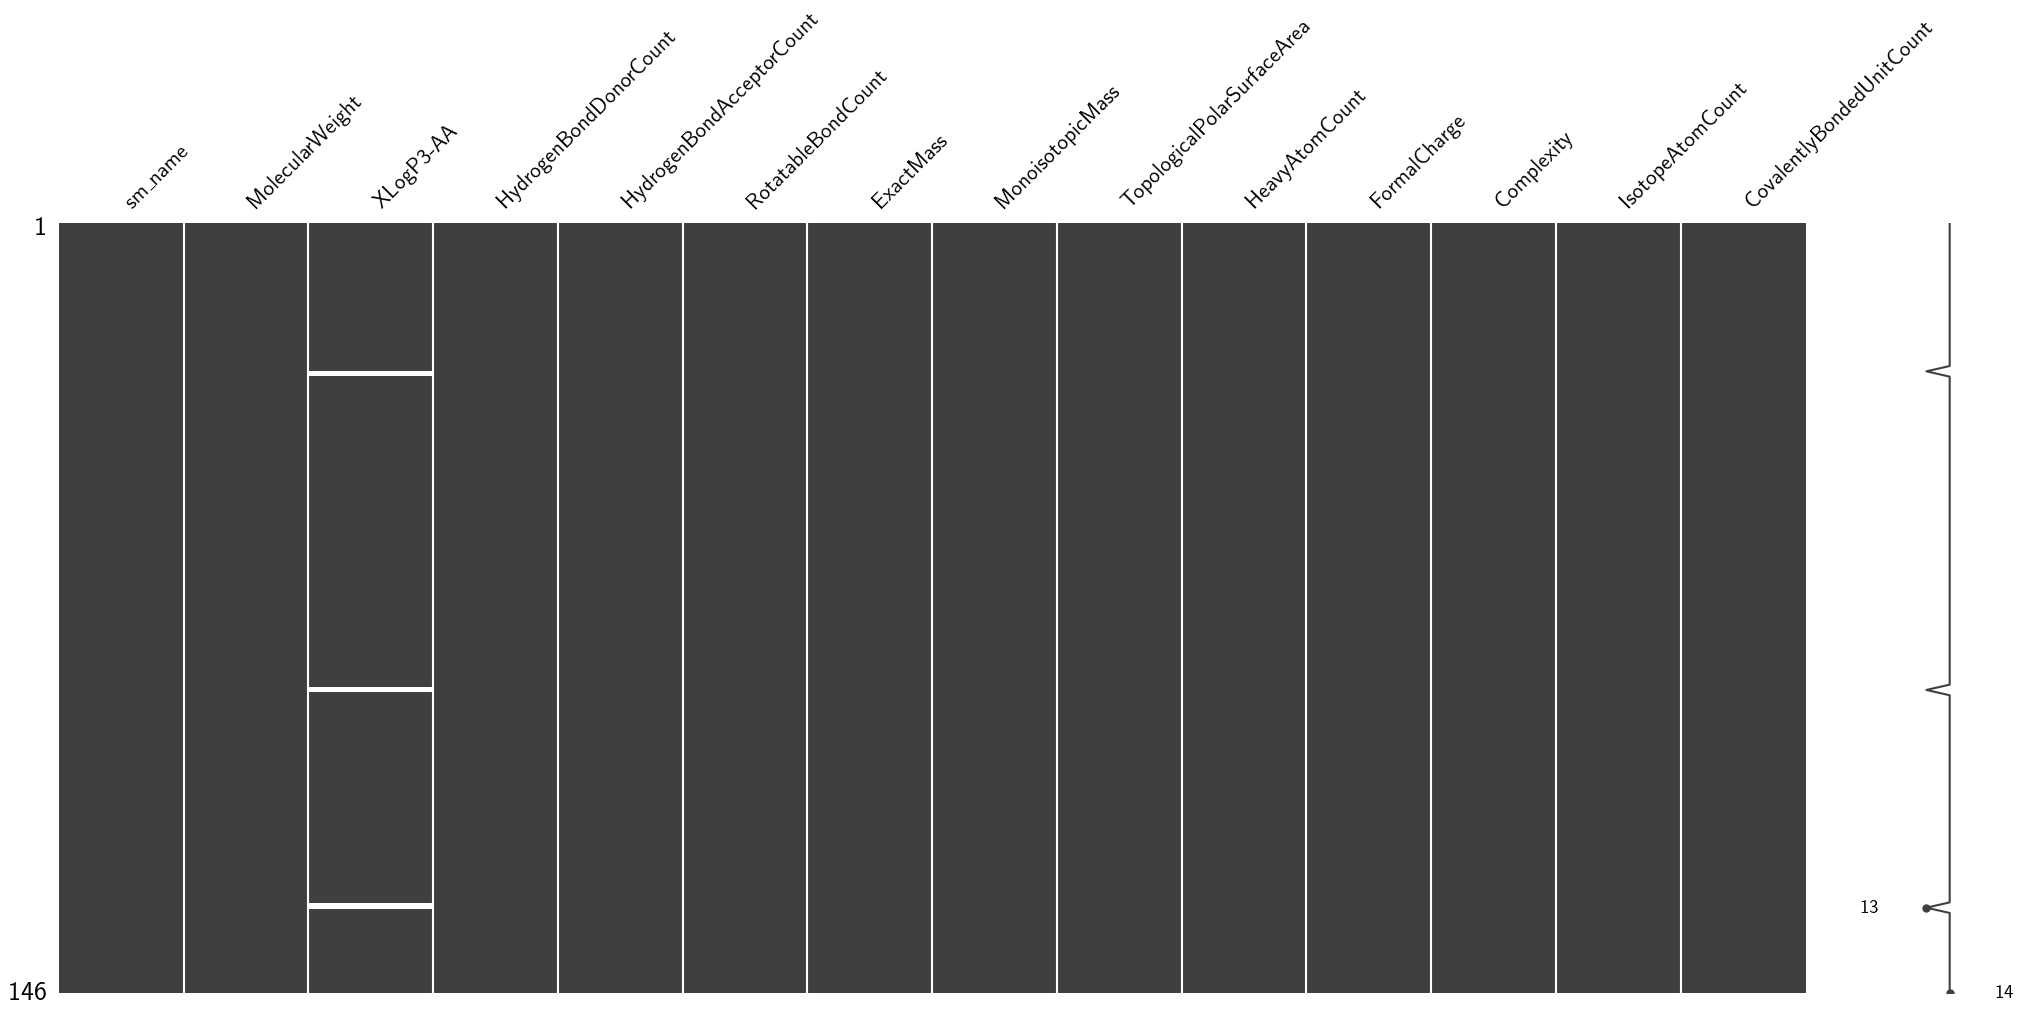

In [13]:
msno.matrix(pubchem_df)

In [14]:
pubchem_df.to_csv('datasets/pubchem_df.csv', index=False)

In [15]:
# Merge pubchem_df with features_enriched
features_enriched = features_enriched.merge(pubchem_df, on='sm_name', how='left')

In [16]:
features_enriched

,cell_type,sm_name,sm_lincs_id,SMILES,control,count_mean_x,count_sum_x,normalized_count_mean_x,normalized_count_sum_x,donor_id,...,HydrogenBondAcceptorCount,RotatableBondCount,ExactMass,MonoisotopicMass,TopologicalPolarSurfaceArea,HeavyAtomCount,FormalCharge,Complexity,IsotopeAtomCount,CovalentlyBondedUnitCount
0,NK cells,Clotrimazole,LSM-5341,Clc1ccccc1C(c1ccccc1)(c1ccccc1)n1ccnc1,False,2.569838,1113646.0,6.089993,2594365.50,donor_0,...,1,4,344.1080262,344.1080262,17.8,25,0,396.0,0,1
1,NK cells,Clotrimazole,LSM-5341,Clc1ccccc1C(c1ccccc1)(c1ccccc1)n1ccnc1,False,2.569838,1113646.0,6.089993,2594365.50,donor_1,...,1,4,344.1080262,344.1080262,17.8,25,0,396.0,0,1
2,NK cells,Clotrimazole,LSM-5341,Clc1ccccc1C(c1ccccc1)(c1ccccc1)n1ccnc1,False,2.569838,1113646.0,6.089993,2594365.50,donor_2,...,1,4,344.1080262,344.1080262,17.8,25,0,396.0,0,1
3,T cells CD4+,Clotrimazole,LSM-5341,Clc1ccccc1C(c1ccccc1)(c1ccccc1)n1ccnc1,False,3.512137,3467640.0,5.708712,5590162.00,donor_0,...,1,4,344.1080262,344.1080262,17.8,25,0,396.0,0,1
4,T cells CD4+,Clotrimazole,LSM-5341,Clc1ccccc1C(c1ccccc1)(c1ccccc1)n1ccnc1,False,3.512137,3467640.0,5.708712,5590162.00,donor_1,...,1,4,344.1080262,344.1080262,17.8,25,0,396.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1837,T cells CD8+,Riociguat,LSM-45758,COC(=O)N(C)c1c(N)nc(-c2nn(Cc3ccccc3F)c3ncccc23...,False,3.357596,539656.0,5.706329,898219.90,donor_1,...,9,5,422.16150004,422.16150004,138.0,31,0,618.0,0,1
1838,T cells CD8+,Riociguat,LSM-45758,COC(=O)N(C)c1c(N)nc(-c2nn(Cc3ccccc3F)c3ncccc23...,False,3.357596,539656.0,5.706329,898219.90,donor_2,...,9,5,422.16150004,422.16150004,138.0,31,0,618.0,0,1
1839,T regulatory cells,Riociguat,LSM-45758,COC(=O)N(C)c1c(N)nc(-c2nn(Cc3ccccc3F)c3ncccc23...,False,3.414985,375389.0,5.501163,596835.44,donor_0,...,9,5,422.16150004,422.16150004,138.0,31,0,618.0,0,1
1840,T regulatory cells,Riociguat,LSM-45758,COC(=O)N(C)c1c(N)nc(-c2nn(Cc3ccccc3F)c3ncccc23...,False,3.414985,375389.0,5.501163,596835.44,donor_1,...,9,5,422.16150004,422.16150004,138.0,31,0,618.0,0,1


<Axes: >

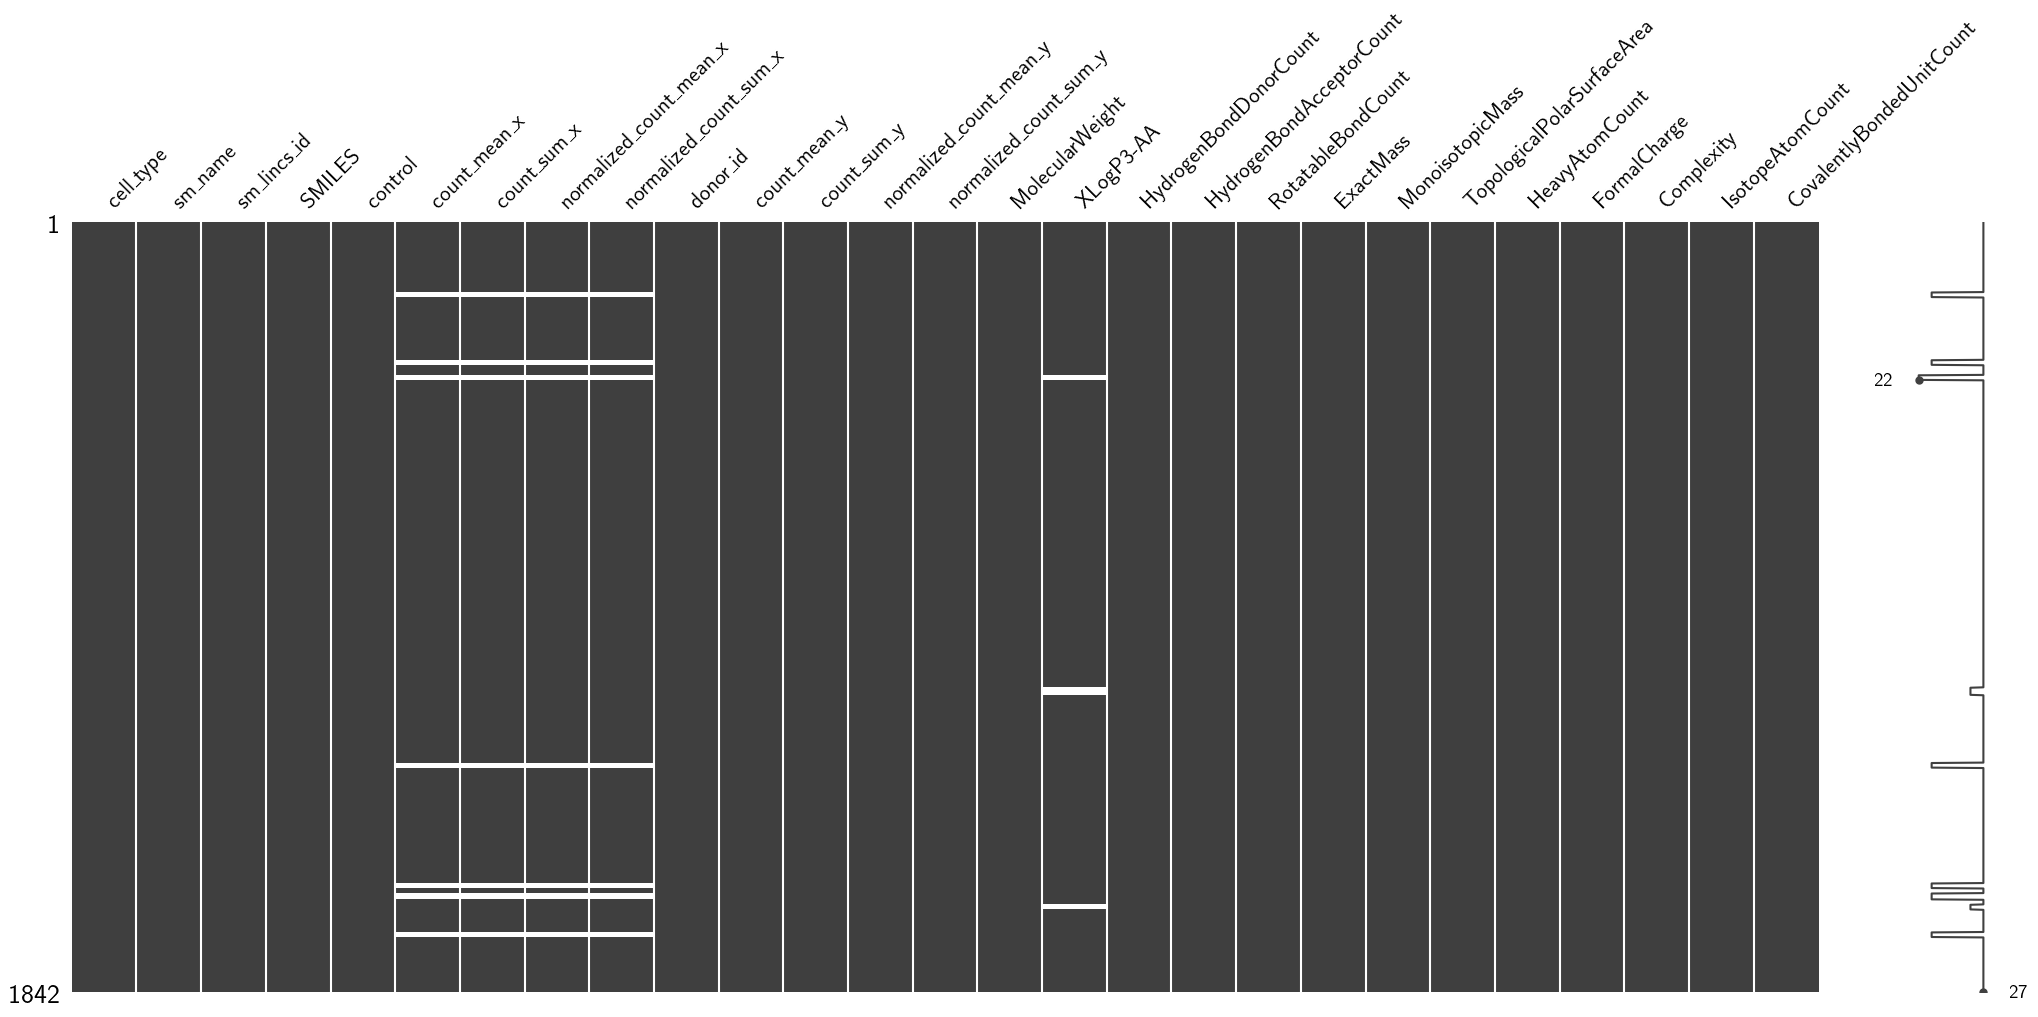

In [17]:
msno.matrix(features_enriched)

In [18]:
features_enriched.to_csv('datasets/features_enriched.csv', index=False)

In [ ]:
final_prediction = pd.read_csv('datasets/final_prediction.csv')

In [ ]:
final_prediction

In [ ]:
final_prediction['sm_name'] = final_prediction['sm_name'].replace('O-Demethylated Adapalene', 'O-Desmethyl Adapalene')
final_prediction['sm_name'] = final_prediction['sm_name'].replace('IN1451',
                                                                    '2-(4-Amino-5-iodo-7-pyrrolo[2,3-d]pyrimidinyl)-5-(hydroxymethyl)oxolane-3,4-diol')
for i in range(len(final_prediction['sm_name'])):
    if final_prediction['sm_name'][i] != '5-(9-Isopropyl-8-methyl-2-morpholino-9H-purin-6-yl)pyrimidin-2-amine' and final_prediction['sm_name'][i] != '2-(4-Amino-5-iodo-7-pyrrolo[2,3-d]pyrimidinyl)-5-(hydroxymethyl)oxolane-3,4-diol':
        final_prediction['sm_name'][i] = final_prediction['sm_name'][i].split('(')[0].strip()
for i in range(len(final_prediction['sm_name'])):
    if final_prediction['sm_name'][i] != '5-(9-Isopropyl-8-methyl-2-morpholino-9H-purin-6-yl)pyrimidin-2-amine' and final_prediction['sm_name'][i] != '2-(4-Amino-5-iodo-7-pyrrolo[2,3-d]pyrimidinyl)-5-(hydroxymethyl)oxolane-3,4-diol':
        final_prediction['sm_name'][i] = final_prediction['sm_name'][i].split(';')[0].strip()

In [ ]:
final_prediction

In [ ]:
# Merge final_prediction with pubchem_df
final_prediction = final_prediction.merge(pubchem_df, on='sm_name', how='left')

In [ ]:
final_prediction

In [ ]:
msno.matrix(final_prediction)

In [ ]:
final_prediction.to_csv('datasets/final_prediction.csv', index=False)